# 01 Entrega



## Instalación librerias 

In [67]:

#install.packages("tm")
#install.packages("pdftools")
#install.packages("quanteda.textstats")
#nstall.packages("quanteda.textplots")
#install.packages("wordcloud")
#install.packages("quanteda.textmodels")
#install.packages("topicmodels")
# install.packages("lubridate")

#' Librerías
library(ggplot2)
library(tm)
library(quanteda)
library(quanteda.textstats)
library(quanteda.textplots)
library(quanteda.textmodels)
library(topicmodels)
library(tidyverse)
library(tidyr)
library(pdftools)
library(wordcloud)
library(IRdisplay)
library(lubridate)

## Importar Data

In [68]:

setwd("C:/Users/molga/Dropbox/Tesis/data/constitutions Chile")
ruta <- "C:/Users/molga/Dropbox/Tesis/data/constitutions Chile"

#'Importar Data set
constituciones <- VCorpus(DirSource(ruta, pattern = ".pdf"), # VCorpus toma la dirección de ruta y lo transforma en un tipo de corpus
        readerControl = list(reader = readPDF, language = "es")) # Lee los pdf

constituciones_corpus <- corpus(constituciones) # Transformación a Corpus

## Limpieza, procesamiento y transformación de Data

In [71]:
#' Eliminar .pdf de los nombres
nombres <- str_remove_all(list.files(ruta), ".pdf")
docvars(constituciones_corpus)

#' Limpieza utilizando tokens
numeros <- c("1","2","3","4","5","6","7","8","9","0","Capítulo", "Artículo", "°", "artículo")

tokens_constituciones <- tokens(constituciones_corpus, remove_punct = T) %>% 
  tokens_remove(pattern = stopwords("es")) %>%  # Eliminación de los stopwords
  tokens_tolower() %>% # Colocar las palabras en minúscula
  tokens_wordstem() %>% # Raiz de las palabras
  tokens_remove(numeros)

author,datetimestamp,description,heading,id,language,origin
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
,2022-11-15 20:09:01,,,Chile_1980.pdf,es,LaTeX via pandoc
Jorge Pasten,2023-09-26 18:29:38,NA,NA,Chile_2005.pdf,es,Microsoft® Word para Microsoft 365
,2022-11-14 18:26:23,,,Chile_2022.pdf,es,LaTeX via pandoc


## Document Features Matrix

In [79]:

#' Creación DFM
dfm_constituciones <- dfm(tokens_constituciones)
print(dfm_constituciones)

#' Topfeatures
print(topfeatures(dfm_constituciones))

#' Key words in context
kw_nacion <- kwic(tokens_constituciones, pattern = "nación*")
print(head(kw_nacion, 10))



Document-feature matrix of: 3 documents, 5,361 features (37.90% sparse) and 7 docvars.
       features
docs     i base institucionalidad 1º.- hombr nacen libr igual dignidad derecho
  text1  3    7                 2   11     2     1   11    10        2      91
  text2  6   10                 1    8    10     1   15    18        3     127
  text3 16   14                 6    0     1     1   38    13        7     402
[ reached max_nfeat ... 5,351 more features ]
         ley      derecho    república constitución    president        podrá 
        1268          620          492          490          483          426 
        caso      persona constitucion          ser 
         391          377          338          333 
Keyword-in-context with 10 matches.                                                                               
   [text1, 74]               ésta promov integración armónica sector | nación |
  [text1, 113]         democrática 5º.- soberanía resid esencialment | nació

## Cloud Plot

In [88]:
#' Creación de cloud para las 3 constituciones

sub = dfm_constituciones %>% dfm_group(groups = id) %>% 
  dfm_subset(id == "Chile_1980" | id == "Chile_2005" | id == "Chile_2022")

cloud_1 <- suppressWarnings(textplot_wordcloud(sub, comparison = TRUE,
                                  max_words = 150, color = c("blue", "red","green"),
                                  labelcolor = "black"))



ERROR: Error in textplot_wordcloud.dfm(sub, comparison = TRUE, max_words = 150, : dfm must have at least one non-zero value


## Keyness

In [82]:
# Importar Data
DIRECTORY <- "C:/Users/molga/Dropbox/Tesis/data/constitutions Chile"


numeros <- c("1","2","3","4","5","6","7","8","9","0","Capítulo", "Artículo", "°", "artículo")

# Creación VCorpus
constituciones <- VCorpus(DirSource(DIRECTORY, pattern = ".pdf"), 
                         readerControl = list(reader = readPDF, language = "es"))

# Creación corpus constituciones en general
constituciones_corpus <- corpus(constituciones)

summary(constitutions_corpus)

# Creación corpus con subsest
chile_corpus <- corpus_subset(constituciones_corpus, grepl("Chile_", id) == TRUE)


# Limpieza
names(chile_corpus) <- c("Chile 1980", "Chile 2005", "Chile 2022")

toks_constituciones <- tokens(chile_corpus, remove_punct = TRUE) 
toks_constituciones <- tokens_remove(toks_constituciones, stopwords(language ="es", source = "snowball"))
toks_constituciones <- tokens_tolower(toks_constituciones) 
toks_constituciones <- tokens_wordstem(toks_constituciones) 
toks_consituciones  <- tokens_remove(toks_constituciones, numeros)


,Text,Types,Tokens,Sentences,author,datetimestamp,description,heading,id,language,origin
,<chr>,<int>,<int>,<int>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
1,text1,3174,23925,583,,2022-11-15 20:09:01,,,Chile_1980.pdf,es,LaTeX via pandoc
2,text2,4097,42224,1132,Jorge Pasten,2023-09-26 18:29:38,NA,NA,Chile_2005.pdf,es,Microsoft® Word para Microsoft 365
3,text3,5281,58559,2642,,2022-11-14 18:26:23,,,Chile_2022.pdf,es,LaTeX via pandoc


### Chile 1980 vs Chile 2022

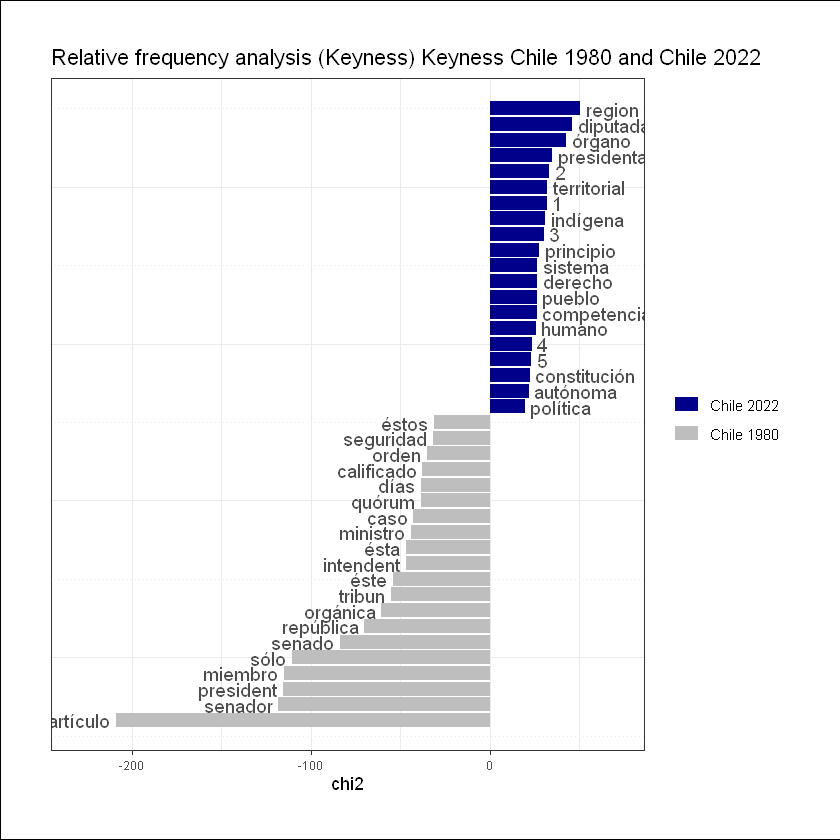

In [89]:

dfm_const <- dfm(toks_constituciones)
dfm_const <- rbind(dfm_const[1,], dfm_const[3,])
tstat_key <- textstat_keyness(dfm_const, target = "Chile 2022")
textplot_keyness(tstat_key) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"),axis.text=element_text(size=7), plot.background = element_rect(fill = "white")) +
  ggtitle("Relative frequency analysis (Keyness) Keyness Chile 1980 and Chile 2022") 
ggsave("./figures/keyness_chile_1925_2022.png", width = 4211, height = 2144, units ="px")


## Chile 2005 vs Chile 2022

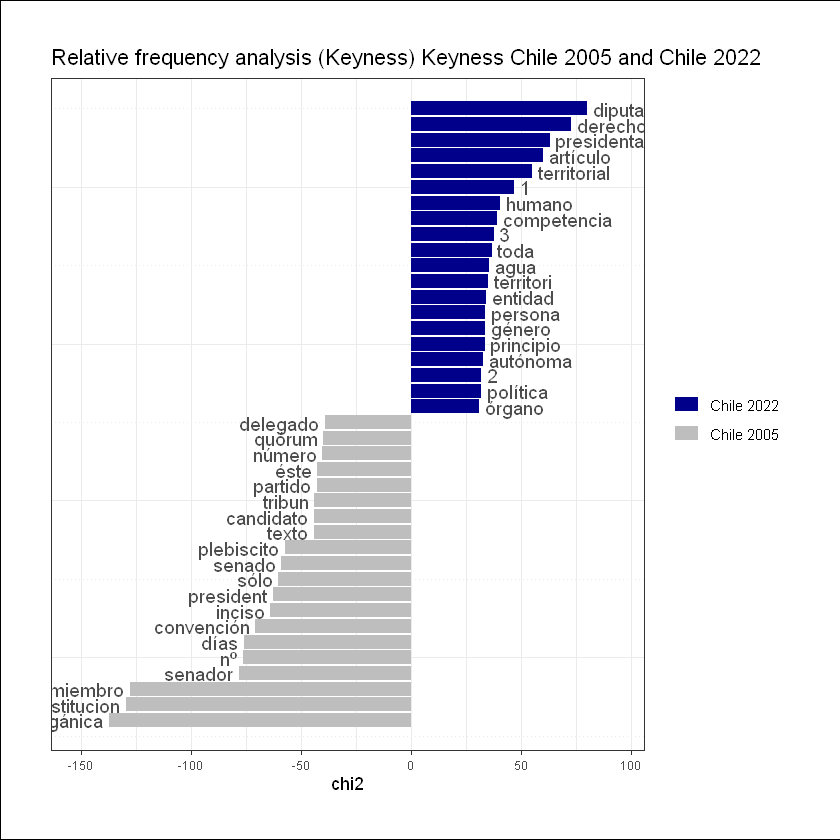

In [84]:
dfm_const <- dfm(toks_constituciones)
dfm_const <- rbind(dfm_const[2,], dfm_const[3,])
tstat_key <- textstat_keyness(dfm_const, target = "Chile 2022")
textplot_keyness(tstat_key) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"),axis.text=element_text(size=7), plot.background = element_rect(fill = "white")) +
  ggtitle("Relative frequency analysis (Keyness) Keyness Chile 2005 and Chile 2022") 
ggsave("./figures/keyness_chile_1925_2022.png", width = 4211, height = 2144, units ="px")


## Chile 2005 vs Chile 1980

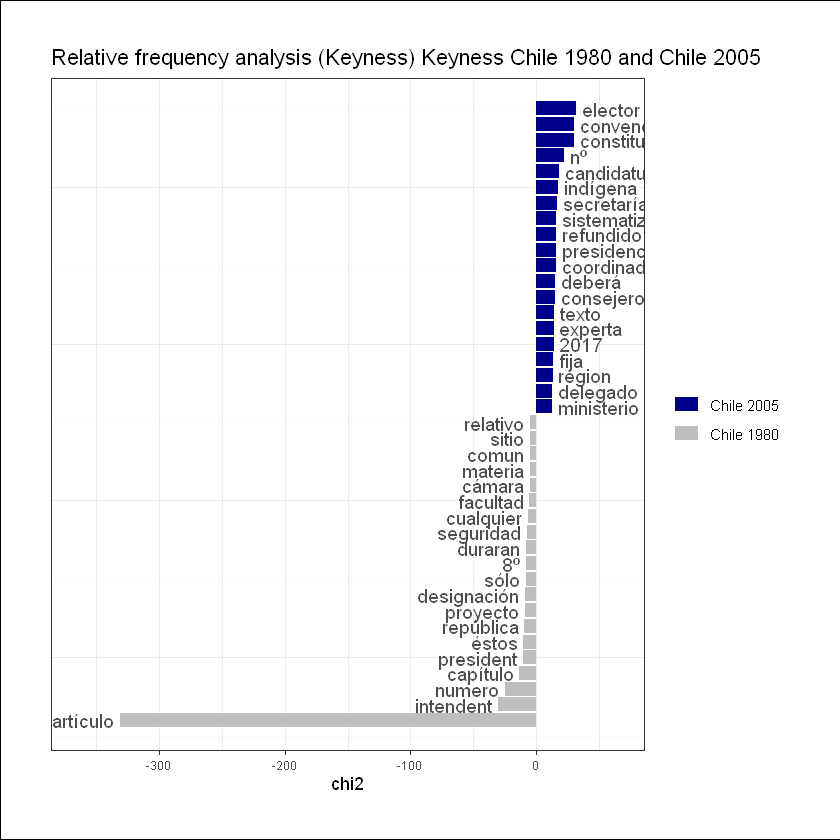

In [85]:
dfm_const <- dfm(toks_constituciones)
dfm_const <- rbind(dfm_const[2,], dfm_const[1,])
tstat_key <- textstat_keyness(dfm_const, target = "Chile 2005")
textplot_keyness(tstat_key) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"),axis.text=element_text(size=7), plot.background = element_rect(fill = "white")) +
  ggtitle("Relative frequency analysis (Keyness) Keyness Chile 1980 and Chile 2005") 
ggsave("./figures/keyness_chile_1925_2022.png", width = 4211, height = 2144, units ="px")